# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Import library untuk klasifikasi dan evaluasi
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:

file_path = './clustering_results.csv'
df = pd.read_csv(file_path)

# Tampilkan 5 baris pertama untuk memastikan data berhasil dimuat
print(df.head())

   age     bmi  smoker      charges  sex  region  Cluster
0   19  27.900       1  16884.92400    0       3        1
1   18  33.770       0   1725.55230    1       2        2
2   28  33.000       0   4449.46200    1       2        2
3   33  22.705       0  21984.47061    1       1        2
4   32  28.880       0   3866.85520    1       1        2


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
X = df.drop(['Cluster'], axis=1)  # Semua fitur kecuali 'cluster'
y = df['Cluster']  # Target adalah hasil kluster

# Pisahkan data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [5]:
# Bangun model klasifikasi (misalnya, RandomForestClassifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model dengan data latih
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [6]:
# Melakukan prediksi pada data uji
y_pred = model.predict(X_test_scaled)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy * 100:.2f}%")

# Menampilkan laporan klasifikasi
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Menampilkan confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Akurasi Model: 99.25%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      0.93      0.96        29
           2       1.00      1.00      1.00       102
           3       0.91      1.00      0.95        21

    accuracy                           0.99       266
   macro avg       0.98      0.98      0.98       266
weighted avg       0.99      0.99      0.99       266


Confusion Matrix:
[[114   0   0   0]
 [  0  27   0   2]
 [  0   0 102   0]
 [  0   0   0  21]]


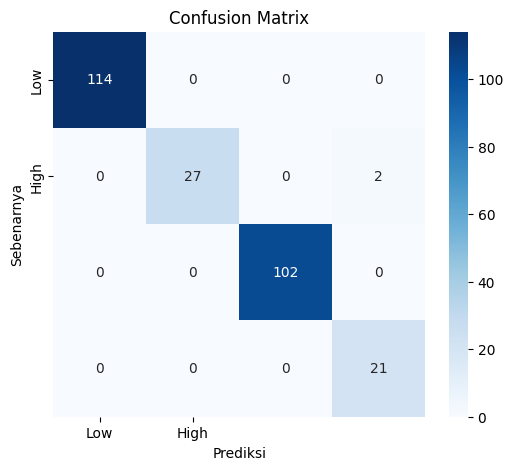

In [7]:
# Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Sebenarnya")
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [8]:
# Contoh untuk GridSearchCV dengan RandomForest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=2)

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [11]:
# Parameter terbaik dari grid search
print("Parameter Terbaik:", grid_search.best_params_)

# Evaluasi ulang model terbaik setelah tuning
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test_scaled)

# Hitung ulang metrik untuk model yang telah dituning
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Akurasi Model Setelah Tuning: {accuracy_tuned * 100:.2f}%")

print("\nLaporan Klasifikasi Setelah Tuning:")
print(classification_report(y_test, y_pred_tuned))

Parameter Terbaik: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Akurasi Model Setelah Tuning: 99.62%

Laporan Klasifikasi Setelah Tuning:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      0.97      0.98        29
           2       1.00      1.00      1.00       102
           3       0.95      1.00      0.98        21

    accuracy                           1.00       266
   macro avg       0.99      0.99      0.99       266
weighted avg       1.00      1.00      1.00       266



## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Akurasi Model: Sebelum tuning, akurasi model sudah sangat tinggi, yaitu 99,25%. Setelah tuning, akurasi meningkat sedikit menjadi 99,62%. Peningkatan ini menunjukkan bahwa tuning hyperparameter memberikan sedikit perbaikan, namun tidak signifikan karena model sudah memiliki performa yang sangat baik sejak awal.

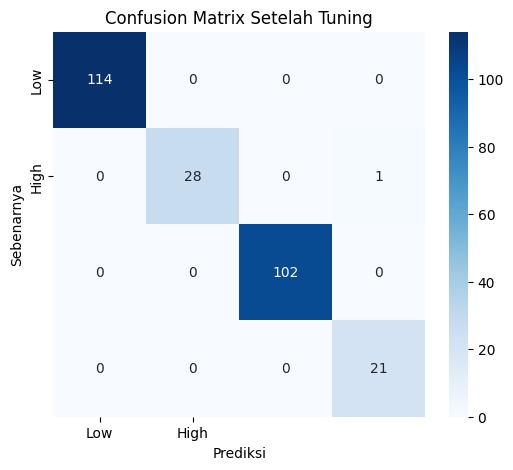

In [10]:
# Visualisasi Confusion Matrix untuk model setelah tuning
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title("Confusion Matrix Setelah Tuning")
plt.xlabel("Prediksi")
plt.ylabel("Sebenarnya")
plt.show()